               Value
2022-01-31  1.764052
2022-02-28  0.400157
2022-03-31  0.978738
2022-04-30  2.240893
2022-05-31  1.867558
...              ...
2029-12-31  0.706573
2030-01-31  0.010500
2030-02-28  1.785870
2030-03-31  0.126912
2030-04-30  0.401989

[100 rows x 1 columns]


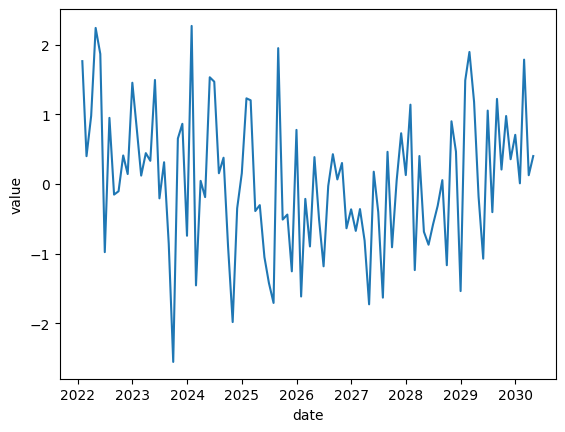

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 시계열 데이터 생성
np. random. seed (0)
n = 100 # 데이터 
data = np.random.normal (0, 1, n)

# 랜덤 시계열 데이터 생성
dates = pd.date_range(start='2022-01-01', periods=n, freq= 'M')

# 데이터프레임 생성
df = pd. DataFrame ( {'Value': data}, index=dates)
print (df)

# 데이터 시각화
plt.plot (df)
plt.xlabel('date')
plt.ylabel('value')
plt.show ()

In [3]:
# Seasonal ARINA 모델 적합 및 예측
model = SARIMAX(df, order= (1, 1, 1), seasonal_order= (1, 1, 1, 12))
results = model.fit ()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45605D+00    |proj g|=  2.08928D-01

At iterate    5    f=  1.35014D+00    |proj g|=  3.29916D-02

At iterate   10    f=  1.34872D+00    |proj g|=  1.06486D-03


 This problem is unconstrained.



At iterate   15    f=  1.34870D+00    |proj g|=  1.63667D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   1.637D-06   1.349D+00
  F =   1.3486968460295179     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


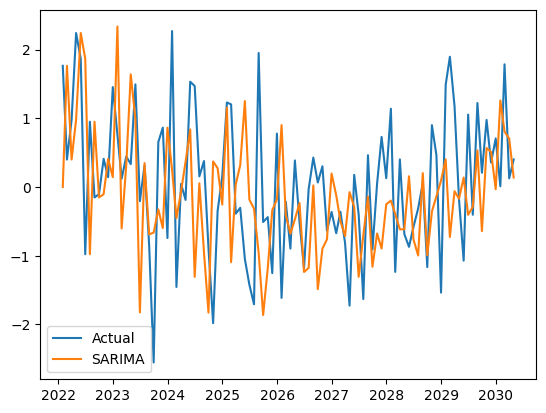

In [4]:
pred = results.predict (start='2022-01-31', end='2030-04-30')
plt.plot (df, label='Actual')
plt.plot (pred, label='SARIMA')
plt.legend()
plt.show()